In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

##**LOADING CIFAR-10 DATASET**

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Convert the data to float32 and scale the pixel values to a range of 0 to 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Convert the target variable to categorical format
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

##**Performing 90/10 split**

In [5]:
# Split the data into training and testing sets using a 90/10 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape

(45000, 32, 32, 3)

##**CNN MODEL**

In [6]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
704/704 [==============================] - 328s 464ms/step - loss: 1.5696 - accuracy: 0.4285 - val_loss: 1.3085 - val_accuracy: 0.5386
Epoch 2/10
704/704 [==============================] - 324s 460ms/step - loss: 1.1567 - accuracy: 0.5900 - val_loss: 0.9531 - val_accuracy: 0.6544
Epoch 3/10
704/704 [==============================] - 323s 458ms/step - loss: 0.9815 - accuracy: 0.6566 - val_loss: 0.8447 - val_accuracy: 0.7020
Epoch 4/10
704/704 [==============================] - 322s 457ms/step - loss: 0.8658 - accuracy: 0.6950 - val_loss: 0.7954 - val_accuracy: 0.7228
Epoch 5/10
704/704 [==============================] - 325s 462ms/step - loss: 0.7859 - accuracy: 0.7251 - val_loss: 0.7636 - val_accuracy: 0.7272
Epoch 6/10
704/704 [==============================] - 320s 454ms/step - loss: 0.7267 - accuracy: 0.7430 - val_loss: 0.7179 - val_accuracy: 0.7452
Epoch 7/10
704/704 [==============================] - 317s 451ms/step - loss: 0.6679 - accuracy: 0.7636 - val_loss: 0.6922 -

In [8]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6848707795143127
Test accuracy: 0.7663000226020813


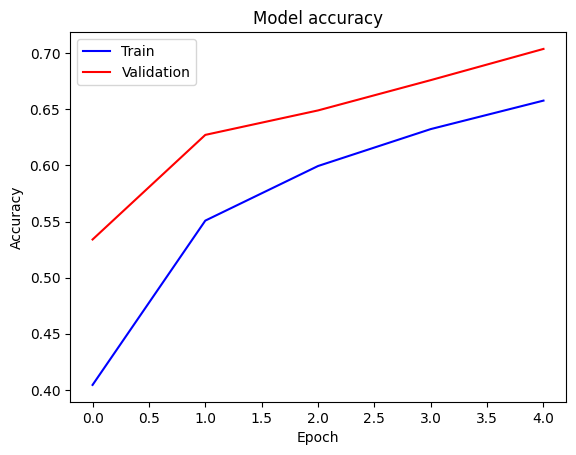

In [34]:
# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

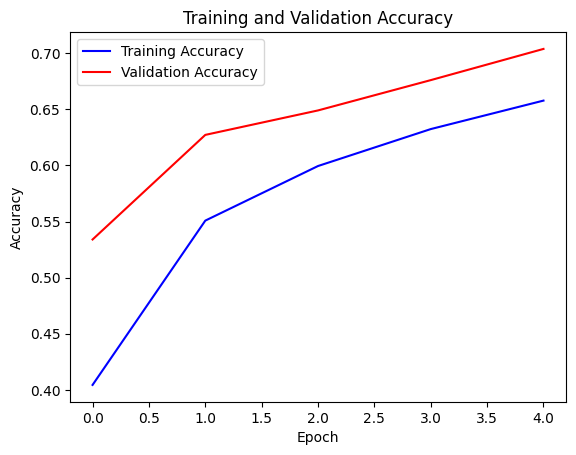

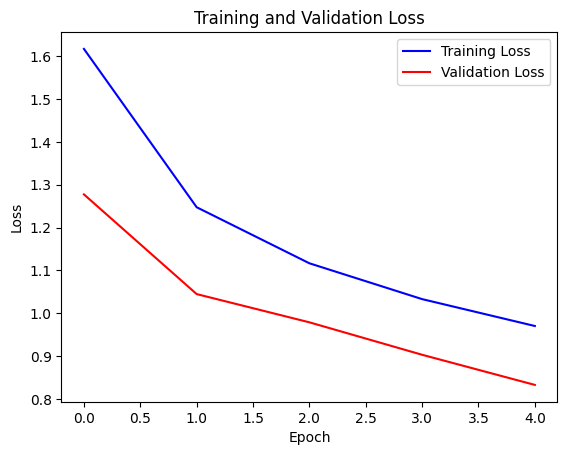

In [35]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

##**CNN MODEL - 2**

In [11]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
704/704 [==============================] - 343s 485ms/step - loss: 1.6167 - accuracy: 0.4044 - val_loss: 1.2774 - val_accuracy: 0.5340
Epoch 2/5
704/704 [==============================] - 324s 461ms/step - loss: 1.2475 - accuracy: 0.5508 - val_loss: 1.0449 - val_accuracy: 0.6272
Epoch 3/5
704/704 [==============================] - 320s 454ms/step - loss: 1.1168 - accuracy: 0.5995 - val_loss: 0.9791 - val_accuracy: 0.6490
Epoch 4/5
704/704 [==============================] - 316s 449ms/step - loss: 1.0332 - accuracy: 0.6324 - val_loss: 0.9034 - val_accuracy: 0.6760
Epoch 5/5
704/704 [==============================] - 317s 450ms/step - loss: 0.9705 - accuracy: 0.6578 - val_loss: 0.8331 - val_accuracy: 0.7038


In [19]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8540269732475281
Test accuracy: 0.6991000175476074


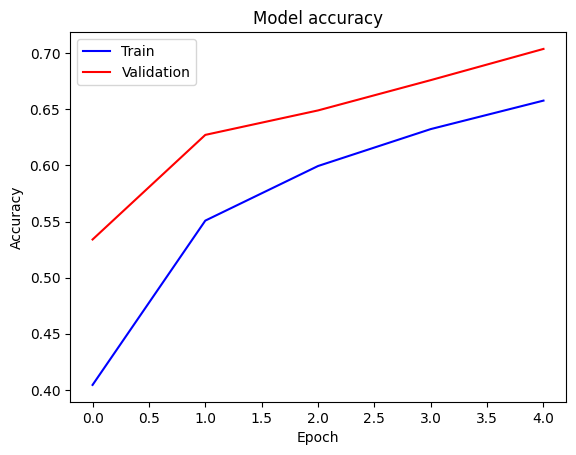

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

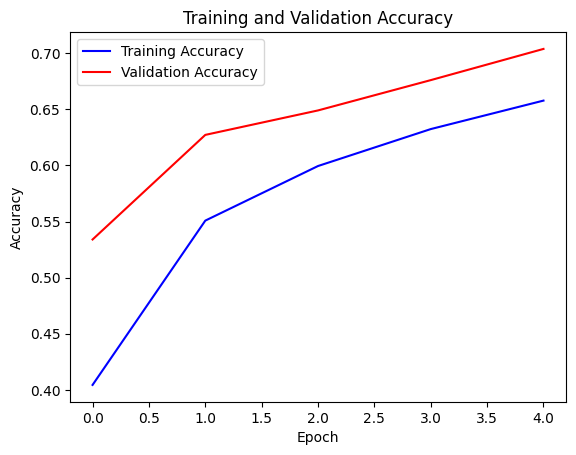

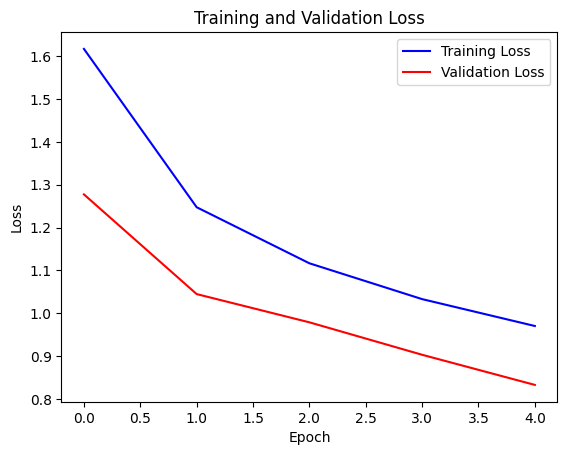

In [38]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

##**CNN MODEL - 3**

In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128)

Epoch 1/30
352/352 [==============================] - 318s 897ms/step - loss: 1.6259 - accuracy: 0.4058 - val_loss: 1.2329 - val_accuracy: 0.5474
Epoch 2/30
352/352 [==============================] - 314s 892ms/step - loss: 1.1900 - accuracy: 0.5764 - val_loss: 1.0448 - val_accuracy: 0.6172
Epoch 3/30
352/352 [==============================] - 312s 883ms/step - loss: 1.0080 - accuracy: 0.6442 - val_loss: 0.9177 - val_accuracy: 0.6766
Epoch 4/30
352/352 [==============================] - 309s 878ms/step - loss: 0.8928 - accuracy: 0.6849 - val_loss: 0.8000 - val_accuracy: 0.7164
Epoch 5/30
352/352 [==============================] - 303s 860ms/step - loss: 0.8140 - accuracy: 0.7143 - val_loss: 0.7424 - val_accuracy: 0.7350
Epoch 6/30
352/352 [==============================] - 305s 868ms/step - loss: 0.7416 - accuracy: 0.7406 - val_loss: 0.7221 - val_accuracy: 0.7468
Epoch 7/30
352/352 [==============================] - 307s 871ms/step - loss: 0.6853 - accuracy: 0.7598 - val_loss: 0.6887 -

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

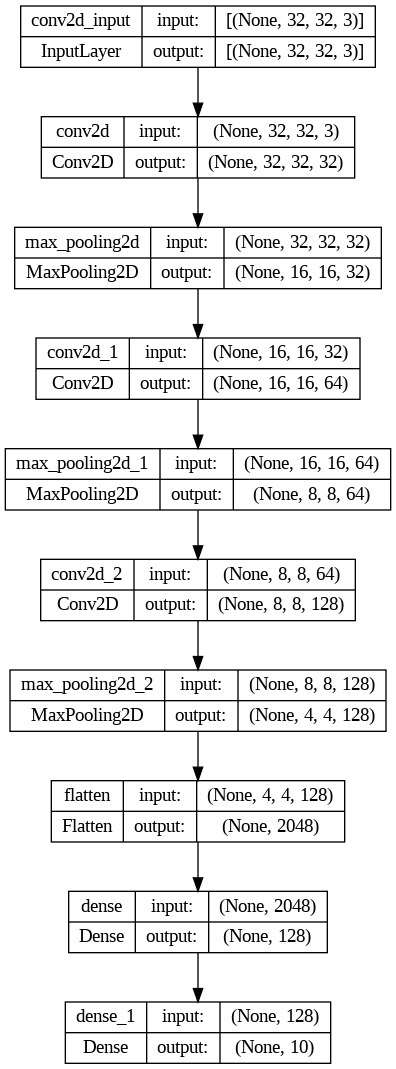

In [ ]:
from keras.utils.vis_utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)
